In [363]:
import networkx as nx
import matplotlib.pyplot as plt
import random as rn
import numpy as np

In [393]:
rn.seed(7)

### Implement the following models in the language of your preference:

#### (a) Random graph

In [342]:
def random_graph(n, p):
    """Returns a random graph according to the Erdos Renyi Model.
    Create an empty graph, add fixed n nodes to it and add edges 
    to the graph randomly according to fixed probability p.
  
    Parameters 
    ----------
    n : int
        Total number of nodes
    p : int
        The value of probablity
  
    Returns 
    -------
    G : Graph 

    """
    
    G = nx.Graph()
    G.add_nodes_from([i for i in range(n)]) 
    
    for i in G.nodes():
        for j in G.nodes():
            if i != j:
                r = rn.random()
                
                if r <= p:
                    G.add_edge(i, j)
                else:
                    continue
    return G

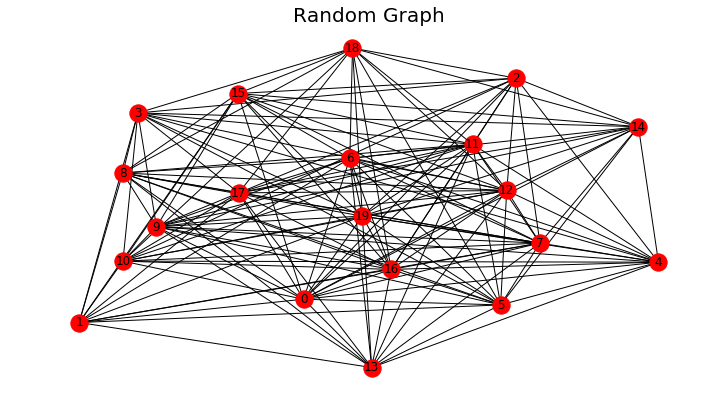

In [343]:
R = random_graph(20, 0.5)
plt.figure(figsize = (9, 5))
nx.draw(R, with_labels = True)
plt.title('Random Graph', fontsize = 20)
plt.show()

In [380]:
def fun(G):
    """ Function for input graph G reports the number of vertices and edges, 
    computes the average degree and the variance of the degree distribution
    and generates the frequency plot for the degrees of the nodes.
    """
    
    list_of_nodes=list(G.nodes())
    list_of_edges=list(G.edges())
    print("Graph {} has {} nodes and {} edges".format(G, len(list_of_nodes), len(list_of_edges)))
    
    list_of_deegres = nx.degree(G)
    x = list(dict(list_of_deegres).values())
    print("Average degree in {} graph is equal to {}".format(G, round(np.mean(x), 2)))
    print("Variance of degree distribution in {} graph is equal to {}".format(G, round(np.var(x)), 2))
    
    plt.figure(figsize = (9, 5))
    plt.hist(x)
    plt.title('Histogram of nodes degrees in {} grapf'.format(G), fontsize = 20)
    plt.show()

Graph  has 2000 nodes and 1498258 edges
Average degree in  graph is equal to 1498.26
Variance of degree distribution in  graph is equal to 379.0


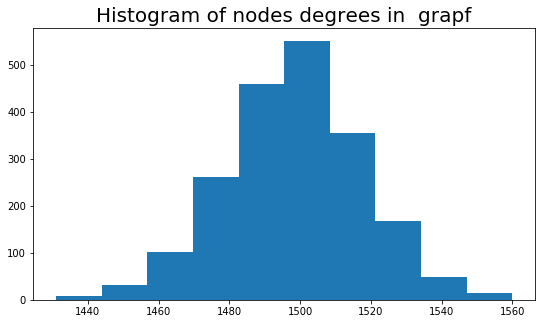

In [394]:
R = random_graph(2000, 0.5)
fun(R)

#### (b) Watts-Strogatz model

In [381]:
def watts_strogatz_graph(n, p, k):
    """Returns a random graph according to the Watts Strogatz Model.
    Model starts with a regular graph and rewires its edges randomly 
    to produce graphs with small-world properties.
  
    Parameters 
    ----------
    n : int
        Total number of nodes
    p : int
        The value of probablity
    k : int
        An even integer, number of nearest neightbours of each node in regular graph. 
  
    Returns 
    -------
    G : Graph 

    """
    
    k = k + 1
    G = nx.Graph()
    G.add_nodes_from([i for i in range(n)])       
    
    for i in G.nodes:
        for j in G.nodes:
            if (0 < abs(i - j) % (n - k / 2)) and (abs(i - j) % (n - k / 2) <= k / 2):
                 G.add_edge(i, j)
    
    for n in G.nodes:
        for l in list(G.neighbors(n)):
            r = rn.random()
            if r > p:
                list_of_nodes = list(G.nodes())
                list_of_nodes.remove(n)
                for d in list(G.neighbors(n)):
                    list_of_nodes.remove(d)
                        
                m = rn.choice(list_of_nodes)
                G.remove_edge(n, l)
                G.add_edge(n, m)
    return G

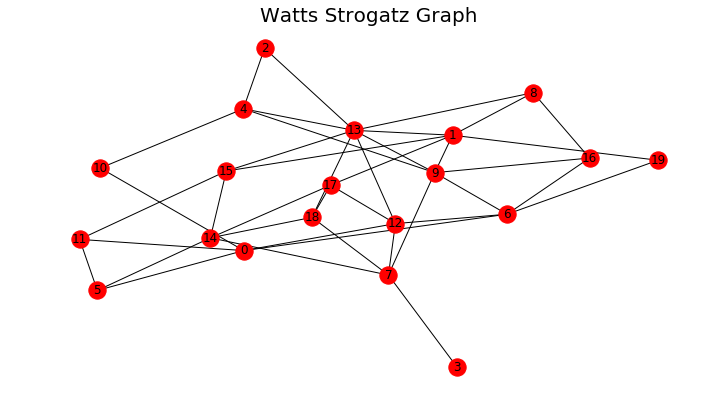

In [382]:
W = watts_strogatz_graph(20, 0.15, 4)
plt.figure(figsize = (9, 5))
nx.draw(W, with_labels = True)
plt.title('Watts Strogatz Graph', fontsize = 20)
plt.show()

Graph  has 2000 nodes and 10000 edges
Average degree in  graph is equal to 10.0
Variance of degree distribution in  graph is equal to 10.0


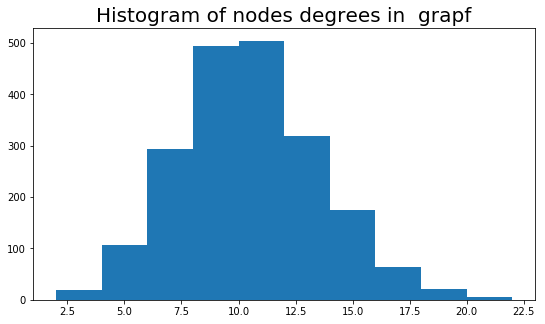

In [396]:
W = watts_strogatz_graph(2000, 0.2, 10)
fun(W)

#### (c) Barabasi-Albert model

In [399]:
def barabasi_albert_graph(n, m, m0):
    """Returns a random graph according to the Barabasi Albert Model.
    A graph of n nodes is grown by attaching new nodes each with m edges 
    that are preferentially attached to existing nodes with high degree. 
  
    Parameters 
    ----------
    n : int
        Total number of nodes
    m : int
        Number of edges to attach from a new node to existing nodes
    m0 : int
        The number of staring m0 nodes, m0 > m
  
    Returns 
    -------
    G : Graph 

    """

    G = nx.complete_graph(m0)
    
    for i in range(m0 + 1, n+1):
        deg = nx.degree(G) 
        num_edges_added = 0
        target_nodes = []
        
        while(num_edges_added <= m):
            p = rn.random()
            j = rn.choice(list(G.nodes()))
            if j not in target_nodes:
        
                if p <= G.degree(j) / sum(dict(deg).values()):
                    G.add_edge(i, j)
                    num_edges_added += 1
                
            else: 
                continue
            
        G.add_node(i)
                 
    return G

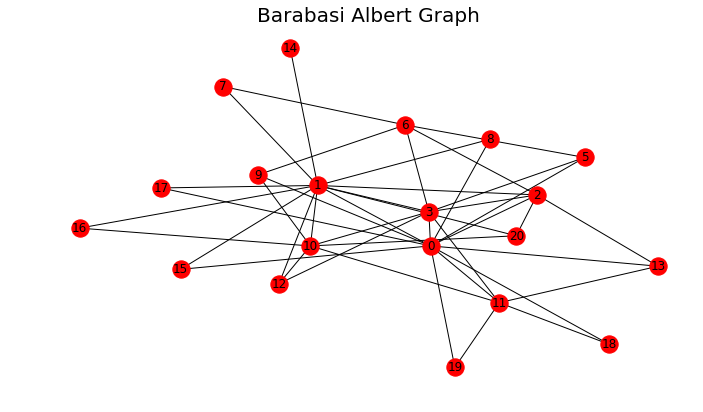

In [400]:
B = barabasi_albert_graph(20, 2, 4)
plt.figure(figsize = (9, 5))
nx.draw(B, with_labels = True)
plt.title('Barabasi Albert Graph', fontsize = 20)
plt.show()

In [401]:
B = barabasi_albert_graph(2000, 2, 1980)

Graph  has 2000 nodes and 1959270 edges
Average degree in  graph is equal to 1959.27
Variance of degree distribution in  graph is equal to 38657.0


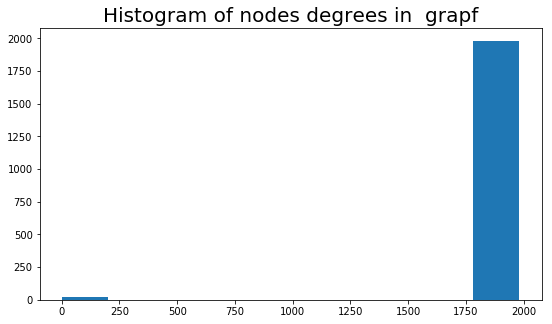

In [402]:
fun(B)